In [2]:
from potentials import d_poly__d_x
import numpy as np
import matplotlib.pyplot as plt

[]

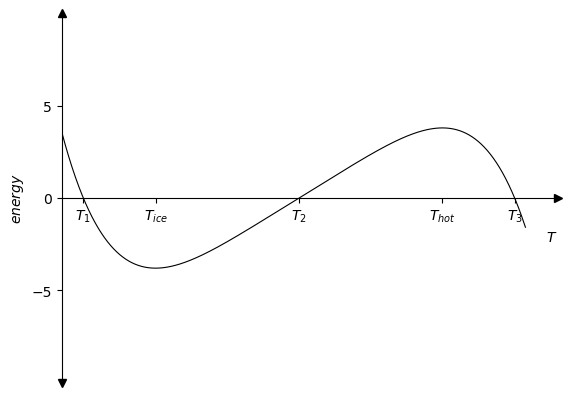

In [83]:
t = np.zeros(10000)
x = np.linspace(-1.5, 1.5, t.shape[0])
extraticks = [-1, -0.66507, 0, 0.66507, 1]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x[:8500], -d_poly__d_x(x[:8500], t[:8500]), 'k-', linewidth=0.8)
plt.xticks([])
plt.yticks([-5, 0, 5])
plt.ylim((-10, 10))
plt.xlim((-1.1, 1.2))
plt.xlabel('$T$', loc='right')
plt.ylabel('$energy$')
plt.xticks(list(plt.xticks()[0]) + extraticks, labels=['$T_1$', r'$T_{ice}$', '$T_2$', r'$T_{hot}$', '$T_3$'])
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.plot((-1.1), (1), '^k', transform=ax.get_xaxis_transform(), clip_on=False)  # Y-axis arrow
ax.plot((-1.1), (0), 'vk', transform=ax.get_xaxis_transform(), clip_on=False)  # Y-axis arrow
ax.plot((1), (0), '>k', transform=ax.get_yaxis_transform(), clip_on=False)  # X-axis arrow
plt.savefig('results/der_pot_showcase.svg', transparent=True)
plt.plot()

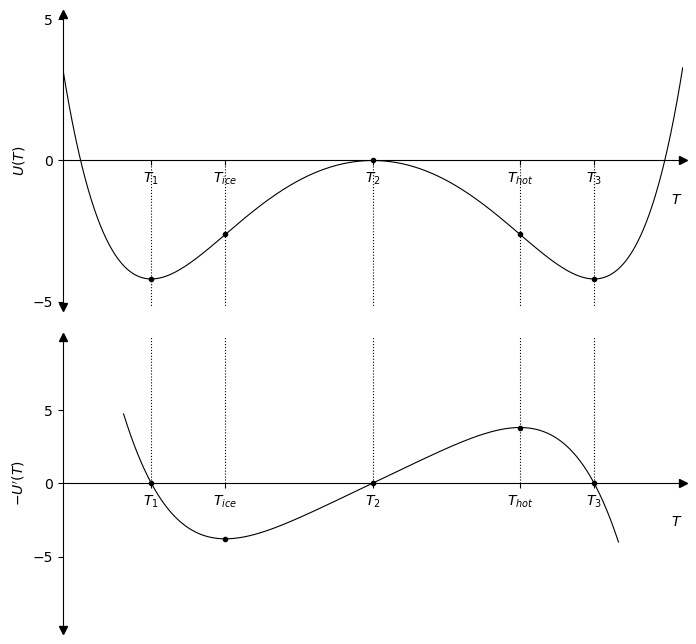

In [147]:
def int_pot(x, a_6=1, a_2=-3.2, a_3=0):
    a_5 = (-3/5)*a_3
    a_4 = (-3*a_6 - a_2)/2
    all_scale = 2

    return all_scale * (a_6 * x**6 + a_5 * x**5 + a_4 * x**4 + a_3 * x**3 + a_2 * x**2)


# Generate data
t = np.zeros(10000)
x = np.linspace(-1.5, 1.5, t.shape[0])
extraticks = [-1, -0.66507, 0, 0.66507, 1]


# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), height_ratios=[1, 1])
plt.subplots_adjust(hspace=0.1)  # Reduce space between plots

# Top subplot
ax1.plot(x, int_pot(x), 'k-', linewidth=0.8)
ax1.scatter(extraticks, int_pot(np.array(extraticks)), color='black', marker='.')

ax1.set_xlim((-1.4, 1.4))
ax1.set_xticks([])  # Remove x-ticks for top plot
ax1.set_xticks(extraticks)
ax1.set_xticklabels(['$T_1$', r'$T_{ice}$', '$T_2$', r'$T_{hot}$', '$T_3$'])
ax1.set_xlabel('$T$', loc='right')
ax1.vlines(extraticks, ymin=0, ymax=-10, colors='black', linestyles=':', linewidth=0.8)
ax1.set_ylim((-5.2, 5.2))
ax1.set_yticks([-5, 0, 5])
ax1.set_ylabel('$U(T)$')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_position('zero')

# Add arrows for top subplot
ax1.plot((1), (0), '>k', transform=ax1.get_yaxis_transform(), clip_on=False)
ax1.plot((-1.4), (1), '^k', transform=ax1.get_xaxis_transform(), clip_on=False)
ax1.plot((-1.4), (0), 'vk', transform=ax1.get_xaxis_transform(), clip_on=False)

# Bottom subplot (your original plot)
ax2.plot(x[1250:8700], -d_poly__d_x(x[1250:8700], t[1250:8700]), 'k-', linewidth=0.8)
ax2.scatter(extraticks, -d_poly__d_x(np.array(extraticks), 0), color='black', marker='.')
ax2.set_yticks([-5, 0, 5])
ax2.set_ylim((-10, 10))
ax2.set_xlim((-1.4, 1.4))
ax2.set_xlabel('$T$', loc='right')
ax2.set_ylabel(r'$-U^{\prime}(T)$')
ax2.set_xticks(extraticks)
ax2.set_xticklabels(['$T_1$', r'$T_{ice}$', '$T_2$', r'$T_{hot}$', '$T_3$'])
ax2.spines['bottom'].set_position('zero')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.vlines(extraticks, ymin=0, ymax=10, colors='black', linestyles=':', linewidth=0.8)


# Add arrows for bottom subplot
ax2.plot((-1.4), (1), '^k', transform=ax2.get_xaxis_transform(), clip_on=False)
ax2.plot((-1.4), (0), 'vk', transform=ax2.get_xaxis_transform(), clip_on=False)
ax2.plot((1), (0), '>k', transform=ax2.get_yaxis_transform(), clip_on=False)


# Save the figure
plt.savefig('results/der_pot_showcase.svg', transparent=True)
plt.show()

In [4]:
from sympy import *

In [6]:
x = symbols('x')

In [9]:
a = 0.005
b = -1.9343
c = 2.14
d = 4.3

def d_f__d_x(x, a=a, b=b, c=c, d=d):
    """
    Calculates the derivative of ax^2(x-c)^2(x-b)^3(x-d)^3
    
    Parameters:
        x: point at which to evaluate derivative
        a, b, c, d: coefficients (default to 1)
    """
    # Breaking down the function into parts for clarity
    # f(x) = ax^2 * (x-c)^2 * (x-b)^3 * (x-d)^3
    
    # Using the product rule repeatedly
    term1 = 2 * x                      # derivative of x^2
    term2 = (x - c) ** 2              # (x-c)^2
    term3 = (x - b) ** 3              # (x-b)^3
    term4 = (x - d) ** 3              # (x-d)^3
    
    term5 = x ** 2                     # x^2
    term6 = 2 * (x - c)               # derivative of (x-c)^2
    
    term7 = x ** 2                     # x^2
    term8 = (x - c) ** 2              # (x-c)^2
    term9 = 3 * (x - b) ** 2          # derivative of (x-b)^3
    
    term10 = x ** 2                    # x^2
    term11 = (x - c) ** 2             # (x-c)^2
    term12 = (x - b) ** 3             # (x-b)^3
    term13 = 3 * (x - d) ** 2         # derivative of (x-d)^3
    
    # Combining all terms using the product rule
    derivative = a * (
        term1 * term2 * term3 * term4 +    # derivative of x^2 term
        term5 * term6 * term3 * term4 +    # derivative of (x-c)^2 term
        term7 * term8 * term9 * term4 +    # derivative of (x-b)^3 term
        term10 * term11 * term12 * term13  # derivative of (x-d)^3 term
    )
    
    return derivative

In [11]:
import numpy as np
import matplotlib.pyplot as plt

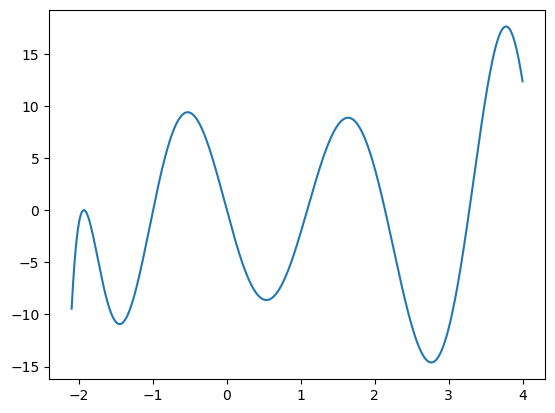

In [12]:
x = np.linspace(-2.1, 4, 10000)

plt.plot(x, d_f__d_x(x))